In [1]:
import numpy as np
import scipy as sp
import scipy.integrate
import math
import matplotlib.pyplot as plt
import csv

In [2]:
class Statistics(object):
    def __init__(self,path,chartype,re):
        if chartype == 'ref':
            pass
        else:
            with open(path+'stats'+chartype, 'r') as f:
                data = list(csv.reader(f, delimiter=' ', skipinitialspace=True,
                                       quoting=csv.QUOTE_NONNUMERIC))
                data = np.transpose(data)
                self.y = data[0]
                self.U = data[1]
                self.V = data[2]
                self.W = data[3]
                self.uu = data[4]
                self.uv = data[5]
                self.uw = data[6]
                self.vv = data[7]
                self.vw = data[8]
                self.ww = data[9]
            del data
            ub = scipy.integrate.simps(self.U,self.y)
            ub2 = ub * ub
            self.U = self.U / ub 
            self.V = self.V / ub 
            self.W = self.W / ub 
            ny = len(self.y)
            cf = np.sqrt(self.U[1]/self.y[1])/re
            yplus = np.zeros((ny), dtype=np.float64)
            self.cf = cf
            self.UU = self.U*self.U
            self.WW = self.W*self.W
            self.VV = np.sqrt(np.asarray(self.UU+self.WW))/cf
            
            for j in range(ny):
                yplus[j] = self.y[j] * cf * re
            self.yplus = yplus *100
            plt.plot(self.yplus,self.U/cf/40)
            #plt.plot(self.V*1000,self.y)
            #plt.plot(self.W*1000,self.y)
            plt.xscale('log')
            plt.xlim(1,self.yplus[-1]/2)
            #plt.ylim(0,25)
            #plt.yscale('log')
            
            
            
            
            

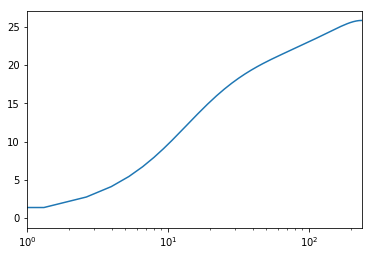

In [3]:
simulation = {}

simulation["incompact3d"] = Statistics('./Channel-flow/','0400', 4200.)